In [2]:
import pandas as pd

In [3]:
#Import the dataset
url = 'https://raw.githubusercontent.com/CodeBlock980/MachineLearningPersonal/refs/heads/main/Exploratory%20Data%20Analysis/EDA%20-%20Data%20Science%20Job%20Postings%20on%20Glassdoor/job_postings.csv'
jobs = pd.read_csv(url)
jobs.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,3.1,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,1993,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",4.2,ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,3.8,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,1981,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,3.5,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,2000,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
jobs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 672 entries, 0 to 671
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              672 non-null    int64  
 1   Job Title          672 non-null    object 
 2   Salary Estimate    672 non-null    object 
 3   Job Description    672 non-null    object 
 4   Rating             672 non-null    float64
 5   Company Name       672 non-null    object 
 6   Location           672 non-null    object 
 7   Headquarters       672 non-null    object 
 8   Size               672 non-null    object 
 9   Founded            672 non-null    int64  
 10  Type of ownership  672 non-null    object 
 11  Industry           672 non-null    object 
 12  Sector             672 non-null    object 
 13  Revenue            672 non-null    object 
 14  Competitors        672 non-null    object 
dtypes: float64(1), int64(2), object(12)
memory usage: 78.9+ KB


In [5]:
jobs.index.dtype

dtype('int64')

In [6]:
#Let us split the data into categorical and numerical values, we include float under the numerical values

categorical_feats = jobs.select_dtypes(include=['object'])
numerical_feats = jobs.select_dtypes(include =['int64', 'float64'])

In [51]:
(categorical_feats['Location'].value_counts().head(7)).index.to_list()

['San Francisco, CA',
 'New York, NY',
 'Washington, DC',
 'Boston, MA',
 'Chicago, IL',
 'Herndon, VA',
 'Cambridge, MA']

In [57]:
top_five = categorical_feats['Location'].value_counts().drop_duplicates().head(5).index
top_five

Index(['San Francisco, CA', 'New York, NY', 'Washington, DC', 'Boston, MA',
       'Chicago, IL'],
      dtype='object', name='Location')

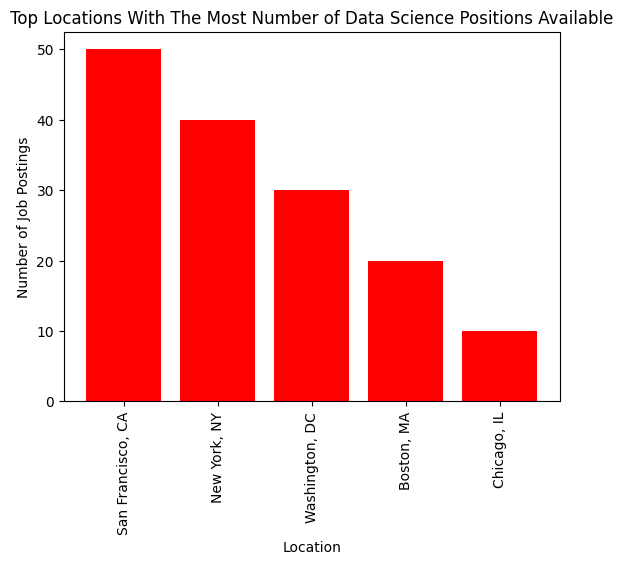

In [71]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

plt.bar(x = top_five, height = np.array([50,40,30,20,10]), color = 'red')
plt.xticks(rotation = 90)
plt.xlabel('Location')
plt.ylabel('Number of Job Postings')
plt.title('Top Locations With The Most Number of Data Science Positions Available')
plt.show()

In [74]:
#Lets explore the numerical features specifically the Rating Columns

max_rating = numerical_feats['Rating'].max()
min_rating = numerical_feats['Rating'].min()

print(f"Max Rating: {max_rating}, Min Rating: {min_rating}")

Max Rating: 5.0, Min Rating: -1.0


In [83]:
#Wtf is a -1.0 rating, lets see if what is the frequency of this value
min_rating_freq = numerical_feats['Rating'].value_counts()[min_rating]
print(f"There are {min_rating_freq} of this -1.0 values in this dataset")

There are 50 of this -1.0 values in this dataset


In [84]:
numerical_feats.shape

(672, 3)

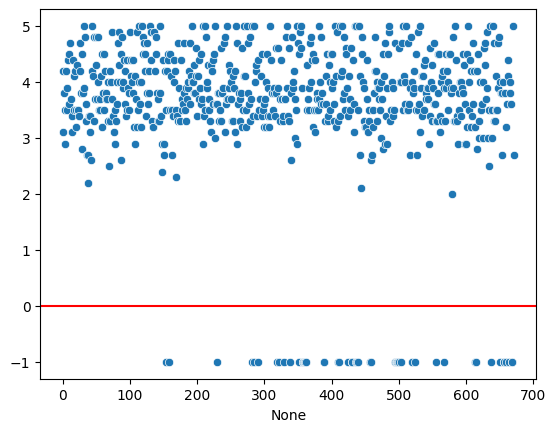

In [88]:
#Visualize the outliers in the ratings
sns.scatterplot(x= numerical_feats['Rating'].index, y= numerical_feats['Rating'].values)
plt.axhline(y= 0, color = 'red')
plt.show()

# Visualizing the Ratings based on their Job positions

In [90]:
#Lets explore the data positions available
categorical_feats.head()

,Job Title,Salary Estimate,Job Description,Company Name,Location,Headquarters,Size,Type of ownership,Industry,Sector,Revenue,Competitors
0,Sr Data Scientist,$137K-$171K (Glassdoor est.),Description\n\nThe Senior Data Scientist is re...,Healthfirst\n3.1,"New York, NY","New York, NY",1001 to 5000 employees,Nonprofit Organization,Insurance Carriers,Insurance,Unknown / Non-Applicable,"EmblemHealth, UnitedHealth Group, Aetna"
1,Data Scientist,$137K-$171K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nJoin ...",ManTech\n4.2,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,Company - Public,Research & Development,Business Services,$1 to $2 billion (USD),-1
2,Data Scientist,$137K-$171K (Glassdoor est.),Overview\n\n\nAnalysis Group is one of the lar...,Analysis Group\n3.8,"Boston, MA","Boston, MA",1001 to 5000 employees,Private Practice / Firm,Consulting,Business Services,$100 to $500 million (USD),-1
3,Data Scientist,$137K-$171K (Glassdoor est.),JOB DESCRIPTION:\n\nDo you have a passion for ...,INFICON\n3.5,"Newton, MA","Bad Ragaz, Switzerland",501 to 1000 employees,Company - Public,Electrical & Electronic Manufacturing,Manufacturing,$100 to $500 million (USD),"MKS Instruments, Pfeiffer Vacuum, Agilent Tech..."
4,Data Scientist,$137K-$171K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [93]:
categorical_feats['Job Title'].value_counts().head()

,count
Job Title,
Data Scientist,337
Data Engineer,26
Senior Data Scientist,19
Machine Learning Engineer,16
Data Analyst,12


In [104]:
number_of_job_types = categorical_feats['Job Title'].value_counts().index.to_list()
print(f"There are {len(number_of_job_types)} job types available in this Dataset")

There are 172 job types available in this Dataset


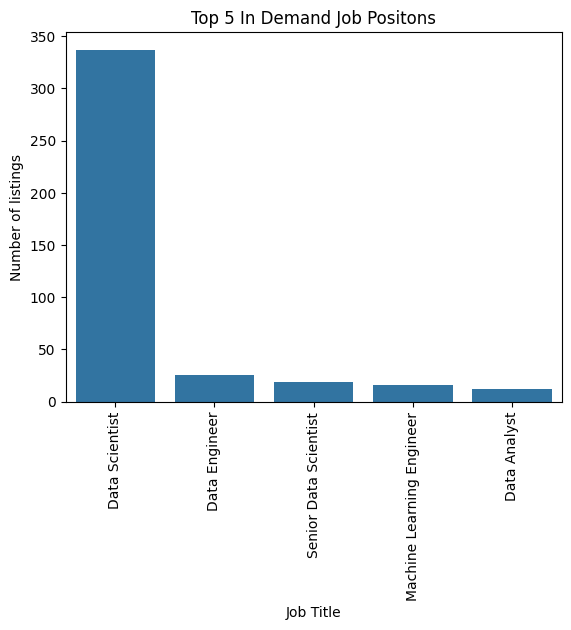

In [106]:
#Next lets visualize first the most in demand listings of job positions
top_job_types = categorical_feats['Job Title'].value_counts().head().index.to_list()

sns.barplot(x = top_job_types, y = categorical_feats['Job Title'].value_counts().head())
plt.title('Top 5 In Demand Job Positons')
plt.xlabel('Job Title')
plt.ylabel('Number of listings')
plt.xticks(rotation = 90)
plt.show()

In [165]:
#Lets check which job positions has the highest rating count

#First select the data science ratings
data_science_ratings = jobs[jobs['Job Title'] == 'Data Scientist']['Rating'].value_counts().head(6).drop(min_rating)


In [168]:
data_science_ratings_top_5 = data_science_ratings.sort_values(ascending = False)

In [169]:
data_science_ratings_top_5

,count
Rating,
3.5,27
3.4,21
3.7,19
3.3,17
5.0,17


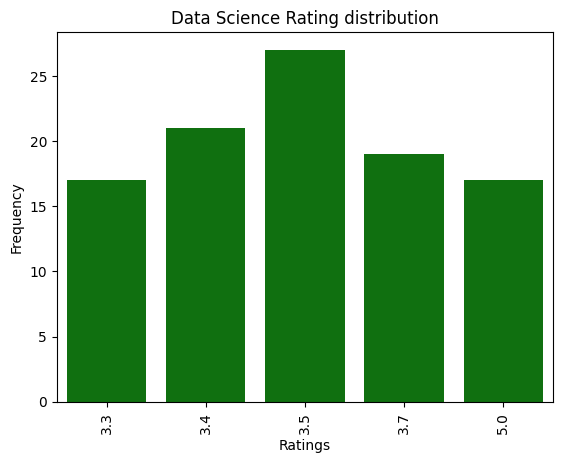

In [171]:
#Plot the Data Science Distribution

sns.barplot(x = data_science_ratings_top_5.index, y= data_science_ratings_top_5.values, color = 'green')
plt.xticks(rotation = 90)
plt.xlabel('Ratings')
plt.ylabel('Frequency')
plt.title('Data Science Rating distribution')
plt.show()

In [ ]:
#not finished